# Password EDA and Feature Engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
data=pd.read_csv('data.csv',error_bad_lines=False)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

b'Skipping line 525174: expected 2 fields, saw 5\nSkipping line 526251: expected 2 fields, saw 5\nSkipping line 529611: expected 2 fields, saw 5\nSkipping line 531398: expected 2 fields, saw 5\nSkipping line 534146: expected 2 fields, saw 5\nSkipping line 544954: expected 2 fields, saw 5\nSkipping line 553002: expected 2 fields, saw 5\nSkipping line 553883: expected 2 fields, saw 5\nSkipping line 553887: expected 2 fields, saw 5\nSkipping line 553915: expected 2 fields, saw 5\nSkipping line 554172: expected 2 fields, saw 5\nSkipping line 563534: expected 2 fields, saw 5\nSkipping line 565191: expected 2 fields, saw 5\nSkipping line 574108: expected 2 fields, saw 5\nSkipping line 574412: expected 2 fields, saw 5\nSkipping line 575985: expected 2 fields, saw 5\nSkipping line 580091: expected 2 fields, saw 5\nSkipping line 582682: expected 2 fields, saw 5\nSkipping line 585885: expected 2 fields, saw 5\nSkipping line 590171: expected 2 fields, saw 5\nSkipping line 591924: expected 2 field

In [3]:
# five elements from the top the data
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [4]:
# shape of the data
data.shape

(669640, 2)

In [5]:
# info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


In [6]:
# desciption of the data
data.describe()

,strength
count,669640.000000
mean,0.990196
std,0.507948
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [7]:
# count of strengths or class value to be predicted
data['strength'].value_counts()

1    496801
0     89702
2     83137
Name: strength, dtype: int64

In [8]:
# dropping the null values in row
data=data.dropna(axis=0)

In [9]:
## shape of the data
data.shape

(669639, 2)

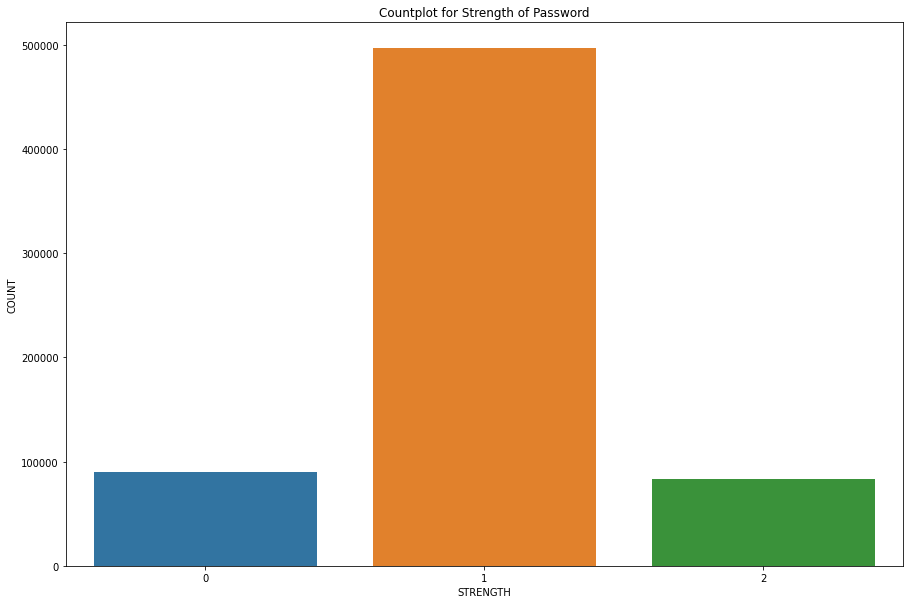

In [10]:
# figure for strength
plt.figure(figsize=(15,10))
sns.countplot(x=data['strength'])
plt.title('Countplot for Strength of Password')
plt.xlabel('STRENGTH')
plt.ylabel('COUNT')
plt.savefig('strength.png')
plt.show()

In [11]:
data['password']=data['password'].astype('str')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669639 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669639 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 35.3+ MB


## Feature Engineering 

In [13]:
def cal_len(x):
    '''
    Calculates the length of a given password.
    '''
    x=str(x)
    return len(x)

def cal_capL(x):
    '''
    Calculates the number of capital letters in the password.
    '''
    x=str(x)
    cnt=0
    for i in x:
        if(i.isupper()):
            cnt+=1
    return cnt

def cal_smL(x):
    '''
    Calculates the nu,ber of small letters in the password.
    '''
    x=str(x)
    cnt=0
    for i in x:
        if(i.islower()):
            cnt+=1
    return cnt

def cal_spc(x):
    '''
    Calculates the number of special characters in the password.
    '''
    x=str(x)
    return (len(x)-len(re.findall('[\w]',x)))


length=lambda x:cal_len(x)
capital=lambda x:cal_capL(x)
small=lambda x:cal_smL(x)
special=lambda x:cal_spc(x)

data['length']=pd.DataFrame(data.password.apply(length))
data['capital']=pd.DataFrame(data.password.apply(capital))
data['small']=pd.DataFrame(data.password.apply(small))
data['special']=pd.DataFrame(data.password.apply(special))

In [14]:
# five elements from the top
data.head()

,password,strength,length,capital,small,special
0,kzde5577,1,8,0,4,0
1,kino3434,1,8,0,4,0
2,visi7k1yr,1,9,0,7,0
3,megzy123,1,8,0,5,0
4,lamborghin1,1,11,0,10,0


In [15]:
def cal_num(x):
    '''
    Calculates the number of numeric values in the password.
    '''
    x=str(x)
    cnt=0
    for i in x:
        if(i.isnumeric()):
            cnt+=1
    return cnt

numeric=lambda x:cal_num(x)
data['numeric']=pd.DataFrame(data.password.apply(cal_num))

In [16]:
# five elements from the top
data.head()

,password,strength,length,capital,small,special,numeric
0,kzde5577,1,8,0,4,0,4
1,kino3434,1,8,0,4,0,4
2,visi7k1yr,1,9,0,7,0,2
3,megzy123,1,8,0,5,0,3
4,lamborghin1,1,11,0,10,0,1


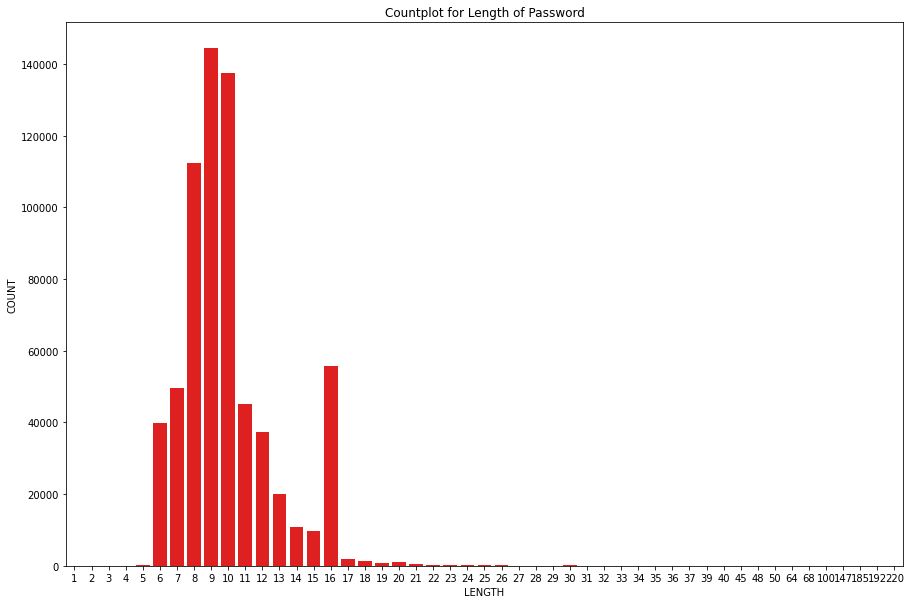

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(x=data['length'],color='red')
plt.title('Countplot for Length of Password')
plt.xlabel('LENGTH')
plt.ylabel('COUNT')
plt.savefig('length.png')
plt.show()

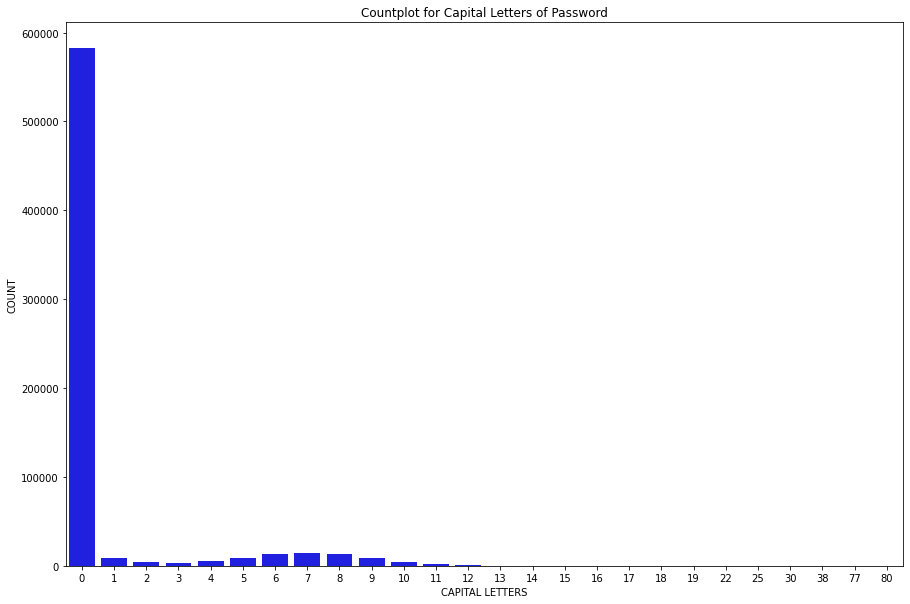

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(x=data['capital'],color='blue')
plt.title('Countplot for Capital Letters of Password')
plt.xlabel('CAPITAL LETTERS')
plt.ylabel('COUNT')
plt.savefig('capital.png')
plt.show()

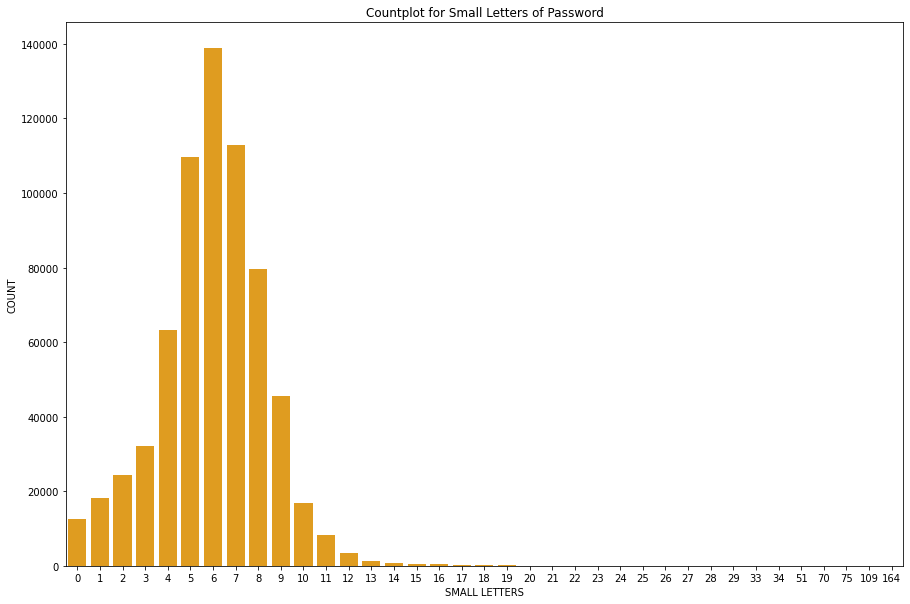

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(x=data['small'],color='orange')
plt.title('Countplot for Small Letters of Password')
plt.xlabel('SMALL LETTERS')
plt.ylabel('COUNT')
plt.savefig('small.png')
plt.show()

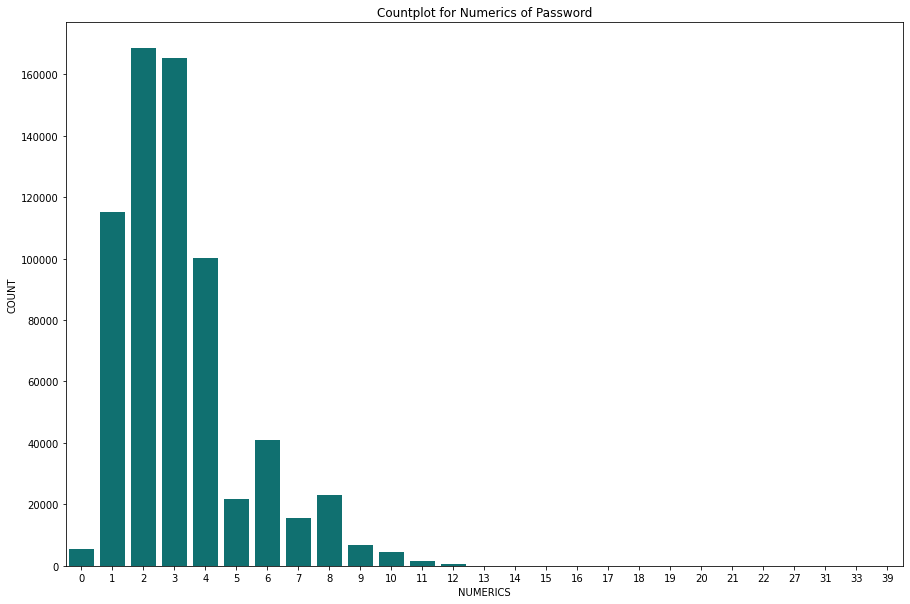

In [20]:
plt.figure(figsize=(15,10))
sns.countplot(x=data['numeric'],color='teal')
plt.title('Countplot for Numerics of Password')
plt.xlabel('NUMERICS')
plt.ylabel('COUNT')
plt.savefig('numerics.png')
plt.show()

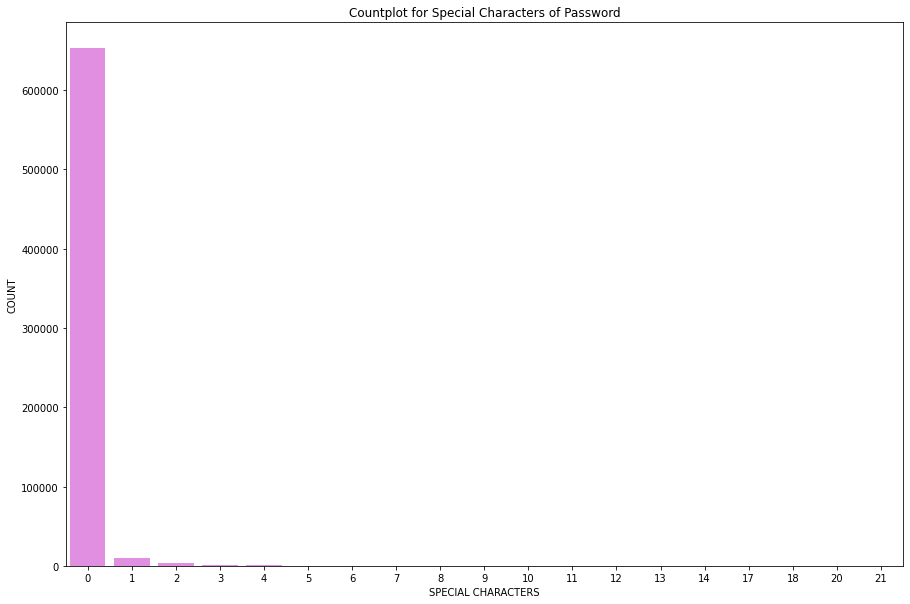

In [21]:
plt.figure(figsize=(15,10))
sns.countplot(x=data['special'],color='violet')
plt.title('Countplot for Special Characters of Password')
plt.xlabel('SPECIAL CHARACTERS')
plt.ylabel('COUNT')
plt.savefig('special.png')
plt.show()

In [22]:
### saving the dataset to the local disk
data.to_csv('processed.csv')